**Module 1: Real-World NLP Application Context**

**Project Purpose**

The NewsBot Intelligence System is designed to automatically analyze and classify news articles. It uses Natural Language Processing (NLP) to extract insights such as sentiment, key entities, topics, and writing patterns. This system simulates real-world media intelligence tools used in modern organizations.

 **Business Case**

News organizations, businesses, and government agencies receive massive amounts of news every day. Manually reading and tracking this information is slow, expensive, and inefficient.
NLP-powered automation allows faster analysis and better decision-making.

 **Industry Context**

This system fits into the media analytics, business intelligence, and information monitoring industries.
Companies increasingly rely on AI to:

Monitor trends

Track public opinion and news narratives

Identify emerging risks and opportunities

Support data-driven communication strategies

**Value Proposition**

This system provides:

Automatic news classification

Entity extraction (people, organizations, locations)

Sentiment and emotion analysis

Trend and keyword insights

Scalable, real-time text processing


In [ ]:
# Install & import required libraries
!pip install kaggle scikit-learn spacy textblob matplotlib seaborn nltk

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

import spacy
from textblob import TextBlob

# Load English NLP model
!python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")

print("✅ Environment ready.")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 149.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
✅ Environment ready.


In [26]:
import pandas as pd

df = pd.read_csv("Train.csv")

df.head(), df.shape, df.columns


(   ArticleId                                               Text  Category
 0       1833  worldcom ex-boss launches defence lawyers defe...  business
 1        154  german business confidence slides german busin...  business
 2       1101  bbc poll indicates economic gloom citizens in ...  business
 3       1976  lifestyle  governs mobile choice  faster  bett...      tech
 4        917  enron bosses in $168m payout eighteen former e...  business,
 (1490, 3),
 Index(['ArticleId', 'Text', 'Category'], dtype='object'))

In [27]:
import pandas as pd
import os

print("📁 Checking CSV files...")
for file in os.listdir('.'):
    if file.endswith('.csv'):
        print(" - ", file)

# Load dataset (BBC uses train.csv)
df = pd.read_csv("Train.csv")
df.head(), df.shape, df.columns


📁 Checking CSV files...
 -  BBC News Sample Solution.csv
 -  Train.csv


(   ArticleId                                               Text  Category
 0       1833  worldcom ex-boss launches defence lawyers defe...  business
 1        154  german business confidence slides german busin...  business
 2       1101  bbc poll indicates economic gloom citizens in ...  business
 3       1976  lifestyle  governs mobile choice  faster  bett...      tech
 4        917  enron bosses in $168m payout eighteen former e...  business,
 (1490, 3),
 Index(['ArticleId', 'Text', 'Category'], dtype='object'))

In [28]:
# Rename columns for consistency
df = df.rename(columns={"Category":"category", "Text":"content"})

# Remove missing values
df = df.dropna(subset=["content","category"])

print("✅ Cleaned dataset")
df.head()
print("\nCategories:", df['category'].unique())

✅ Cleaned dataset

Categories: ['business' 'tech' 'politics' 'sport' 'entertainment']


In [31]:
# Module 2: Text Preprocessing Pipeline

import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt_tab') # Download the missing resource

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)  # remove URLs
    text = re.sub(r"[^a-z\s]", "", text)  # keep only letters
    tokens = word_tokenize(text)  # tokenize
    tokens = [w for w in tokens if w not in stop_words and len(w) > 2]  # remove stopwords & short tokens
    tokens = [lemmatizer.lemmatize(w) for w in tokens]  # lemmatization
    return " ".join(tokens)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [32]:
df["clean_text"] = df["content"].apply(clean_text)
df.head()


,ArticleId,content,category,clean_text
0,1833,worldcom ex-boss launches defence lawyers defe...,business,worldcom exboss launch defence lawyer defendin...
1,154,german business confidence slides german busin...,business,german business confidence slide german busine...
2,1101,bbc poll indicates economic gloom citizens in ...,business,bbc poll indicates economic gloom citizen majo...
3,1976,lifestyle governs mobile choice faster bett...,tech,lifestyle governs mobile choice faster better ...
4,917,enron bosses in $168m payout eighteen former e...,business,enron boss payout eighteen former enron direct...


In [33]:
for i in range(3):
    print("---- ORIGINAL ----")
    print(df["content"].iloc[i][:200] + "...")
    print("---- CLEANED ----")
    print(df["clean_text"].iloc[i][:200] + "...")
    print("\n")


---- ORIGINAL ----
worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness.  cynthia cooper  ...
---- CLEANED ----
worldcom exboss launch defence lawyer defending former worldcom chief bernie ebbers battery fraud charge called company whistleblower first witness cynthia cooper worldcom exhead internal accounting a...


---- ORIGINAL ----
german business confidence slides german business confidence fell in february knocking hopes of a speedy recovery in europe s largest economy.  munich-based research institute ifo said that its confid...
---- CLEANED ----
german business confidence slide german business confidence fell february knocking hope speedy recovery europe largest economy munichbased research institute ifo said confidence index fell february ja...


---- ORIGINAL ----
bbc poll indicates economic gloom citizens in a majority of nations surveyed in a bbc w

In [34]:
# Module 3: TF-IDF Feature Extraction & Visualization

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=3000, ngram_range=(1,2))
X_tfidf = tfidf.fit_transform(df["clean_text"])
y = df["category"]

print("TF-IDF shape:", X_tfidf.shape)


TF-IDF shape: (1490, 3000)


In [35]:
import pandas as pd
import numpy as np

feature_names = np.array(tfidf.get_feature_names_out())

def top_terms_for_category(category, n=10):
    idx = df[df["category"] == category].index
    category_tfidf = X_tfidf[idx].mean(axis=0).A1
    top_idx = np.argsort(category_tfidf)[-n:]
    return feature_names[top_idx]

categories = df["category"].unique()

for cat in categories:
    print(f"\n🔹 Top keywords for category: {cat}")
    print(top_terms_for_category(cat, 10))



🔹 Top keywords for category: business
['economy' 'sale' 'share' 'growth' 'year' 'bank' 'market' 'company' 'firm'
 'said']

🔹 Top keywords for category: tech
['computer' 'software' 'service' 'user' 'game' 'technology' 'said'
 'people' 'phone' 'mobile']

🔹 Top keywords for category: politics
['brown' 'minister' 'would' 'government' 'tory' 'party' 'blair' 'election'
 'labour' 'said']

🔹 Top keywords for category: sport
['team' 'chelsea' 'cup' 'champion' 'match' 'said' 'player' 'win' 'england'
 'game']

🔹 Top keywords for category: entertainment
['year' 'actor' 'said' 'band' 'music' 'show' 'star' 'best' 'award' 'film']


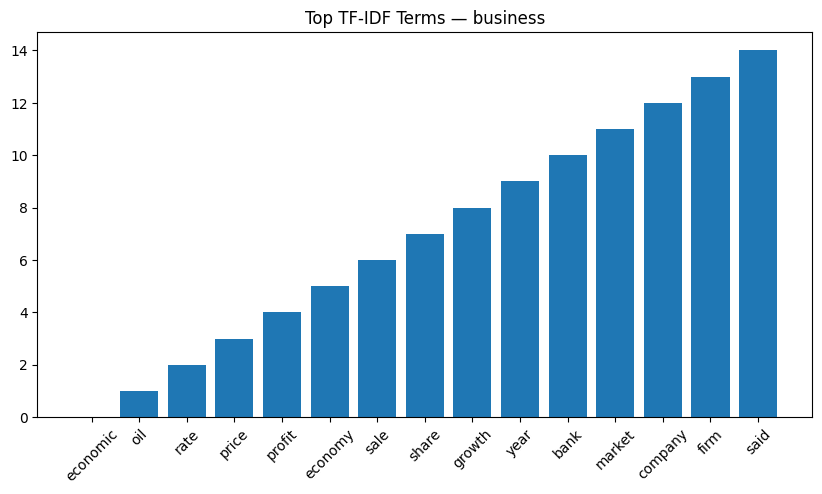

In [36]:
import matplotlib.pyplot as plt

cat = df["category"].unique()[0]  # first category (you can change later)
scores = top_terms_for_category(cat, 15)

plt.figure(figsize=(10,5))
plt.bar(scores, range(len(scores)))
plt.title(f"Top TF-IDF Terms — {cat}")
plt.xticks(rotation=45)
plt.show()


In [37]:
# Module 4 : POS Tagging & Writing Style Analysis

def get_pos_tags(text):
    doc = nlp(text)
    return [token.pos_ for token in doc]

df['pos_tags'] = df['clean_text'].apply(get_pos_tags)

df[['content','pos_tags']].head(2)


,content,pos_tags
0,worldcom ex-boss launches defence lawyers defe...,"[PROPN, PROPN, PROPN, NOUN, NOUN, VERB, ADJ, P..."
1,german business confidence slides german busin...,"[ADJ, NOUN, NOUN, NOUN, ADJ, NOUN, NOUN, VERB,..."


In [38]:
from collections import Counter

# Count POS tags
df['pos_counts'] = df['pos_tags'].apply(lambda x: Counter(x))

# Example
df[['content','pos_counts']].head(2)


,content,pos_counts
0,worldcom ex-boss launches defence lawyers defe...,"{'PROPN': 33, 'NOUN': 80, 'VERB': 37, 'ADJ': 1..."
1,german business confidence slides german busin...,"{'ADJ': 30, 'NOUN': 76, 'VERB': 39, 'PROPN': 3..."


In [40]:
categories = df['category'].unique()
pos_summary = {}

for cat in categories:
    pos_list = df[df['category']==cat]['pos_tags'].sum()
    pos_summary[cat] = Counter(pos_list)

# Convert to DataFrame for visualization
pos_df = pd.DataFrame(pos_summary).fillna(0).astype(int)
pos_df


,business,tech,politics,sport,entertainment
PROPN,9588,7283,10306,15387,11265
NOUN,26638,32135,26326,20269,19144
VERB,12218,14467,14231,11793,9246
ADJ,8427,9652,8446,7446,6064
ADV,2425,3387,2737,2863,1998
PRON,57,230,207,222,141
AUX,887,1018,1423,751,438
X,9,24,9,6,24
NUM,757,1103,652,1123,929
SCONJ,328,254,239,319,173


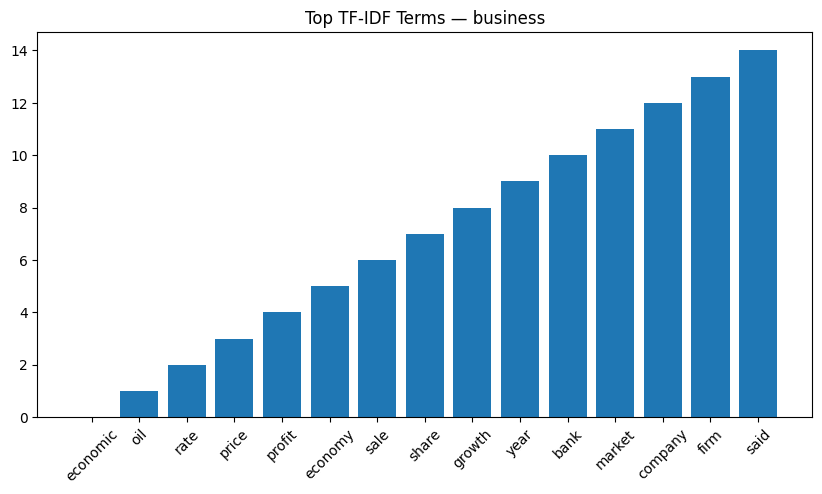

In [41]:
import matplotlib.pyplot as plt

cat = df["category"].unique()[0]  # first category (you can change later)
scores = top_terms_for_category(cat, 15)

plt.figure(figsize=(10,5))
plt.bar(scores, range(len(scores)))
plt.title(f"Top TF-IDF Terms — {cat}")
plt.xticks(rotation=45)
plt.show()


In [42]:
# Calculate percentage of nouns and verbs per category
style_df = pos_df.T
style_df['NOUN_percent'] = style_df['NOUN'] / style_df.sum(axis=1) * 100
style_df['VERB_percent'] = style_df['VERB'] / style_df.sum(axis=1) * 100

style_df[['NOUN_percent','VERB_percent']]


,NOUN_percent,VERB_percent
business,43.009607,19.713444
tech,45.442333,20.444750
politics,40.311146,21.777484
sport,33.222967,19.319414
entertainment,38.237526,18.453529


In [43]:
# Module 5 — Syntax Parsing & Semantic Analysis

# Step 1 — Dependency Parsing Example

# Parse the first article as example
doc = nlp(df['clean_text'].iloc[0])

print("Text:", df['clean_text'].iloc[0][:200], "...\n")
for token in doc[:30]:  # show first 30 tokens
    print(f"{token.text:12} {token.dep_:10} {token.head.text:12} {token.pos_}")


Text: worldcom exboss launch defence lawyer defending former worldcom chief bernie ebbers battery fraud charge called company whistleblower first witness cynthia cooper worldcom exhead internal accounting a ...

worldcom     compound   lawyer       PROPN
exboss       compound   launch       PROPN
launch       compound   lawyer       PROPN
defence      compound   lawyer       NOUN
lawyer       nsubj      whistleblower NOUN
defending    acl        lawyer       VERB
former       amod       ebbers       ADJ
worldcom     nmod       chief        PROPN
chief        compound   ebbers       PROPN
bernie       compound   ebbers       PROPN
ebbers       compound   charge       PROPN
battery      compound   fraud        NOUN
fraud        compound   charge       NOUN
charge       dobj       defending    NOUN
called       acl        charge       VERB
company      oprd       called       NOUN
whistleblower csubj      pleaded      ADJ
first        amod       witness      ADJ
witness      compound   co

In [44]:
# Step 2 — Extract Subject-Verb-Object (SVO) Triplets

def extract_svo(doc):
    svos = []
    for token in doc:
        if token.dep_ in ("nsubj","nsubjpass") and token.head.pos_ == "VERB":
            subj = token.text
            verb = token.head.text
            obj = [child.text for child in token.head.children if child.dep_ in ("dobj","pobj")]
            if obj:
                svos.append((subj, verb, obj[0]))
    return svos

# Apply to first 3 articles as example
for i in range(3):
    doc = nlp(df['clean_text'].iloc[i])
    print(f"Article {i+1} SVO Triplets:", extract_svo(doc))


Article 1 SVO Triplets: [('warning', 'led', 'firm'), ('worldcom', 'ordering', 'hide'), ('business', 'told', 'jury'), ('andersen', 'approved', 'accounting'), ('ebbers', 'ordered', 'firm'), ('sullivan', 'mentioned', 'anything'), ('worldcom', 'emerged', 'protection')]
Article 2 SVO Triplets: [('sector', 'signal', 'activity'), ('export', 'kept', 'thing'), ('rate', 'stuck', 'firm'), ('problem', 'delay', 'rise')]
Article 3 SVO Triplets: [('economy', 'worsening', 'respondent'), ('future', 'questioned', 'poll'), ('country', 'questioned', 'poll'), ('people', 'conducted', 'firm'), ('people', 'seem', 'development'), ('world', 'perception', 'division'), ('people', 'subject', 'country'), ('euro', 'viewed', 'salary')]


In [45]:
# Count number of verbs, nouns, adjectives per article
def syntactic_features(doc):
    counts = {'NOUN':0,'VERB':0,'ADJ':0,'ADV':0,'PRON':0}
    for token in doc:
        if token.pos_ in counts:
            counts[token.pos_] += 1
    return counts

df['syntax_features'] = df['clean_text'].apply(lambda x: syntactic_features(nlp(x)))
df[['content','syntax_features']].head(2)


,content,syntax_features
0,worldcom ex-boss launches defence lawyers defe...,"{'NOUN': 80, 'VERB': 37, 'ADJ': 14, 'ADV': 4, ..."
1,german business confidence slides german busin...,"{'NOUN': 76, 'VERB': 39, 'ADJ': 30, 'ADV': 9, ..."


In [46]:
# Step 4 — Semantic Role Summary by Category

# Aggregate average number of nouns, verbs, adjectives per category
syntax_df = pd.DataFrame(df['syntax_features'].to_list())
syntax_df['category'] = df['category']

semantic_summary = syntax_df.groupby('category').mean()
semantic_summary

,NOUN,VERB,ADJ,ADV,PRON
category,,,,,
business,79.279762,36.363095,25.080357,7.217262,0.169643
entertainment,70.124542,33.868132,22.212454,7.318681,0.516484
politics,96.080292,51.937956,30.824818,9.989051,0.755474
sport,58.580925,34.083815,21.520231,8.274566,0.641618
tech,123.122605,55.429119,36.980843,12.977011,0.881226


In [47]:
# Module 6 — Sentiment & Emotion Analysis

# Step 1 — Calculate Sentiment for Each Article

from textblob import TextBlob

def get_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0.05:
        sentiment = "Positive"
    elif polarity < -0.05:
        sentiment = "Negative"
    else:
        sentiment = "Neutral"
    return sentiment, polarity

df[['sentiment','polarity']] = df['clean_text'].apply(lambda x: pd.Series(get_sentiment(x)))

df[['content','sentiment','polarity']].head(5)


,content,sentiment,polarity
0,worldcom ex-boss launches defence lawyers defe...,Neutral,-0.038745
1,german business confidence slides german busin...,Positive,0.054624
2,bbc poll indicates economic gloom citizens in ...,Neutral,-0.011441
3,lifestyle governs mobile choice faster bett...,Positive,0.112922
4,enron bosses in $168m payout eighteen former e...,Neutral,-0.006548


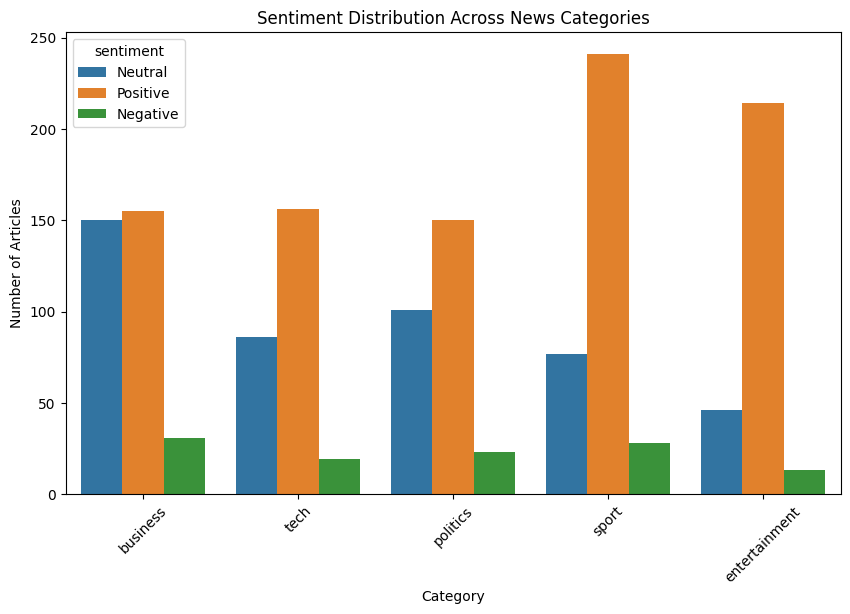

In [48]:
# Step 2 — Sentiment Distribution Across Categories

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='category', hue='sentiment')
plt.title("Sentiment Distribution Across News Categories")
plt.xlabel("Category")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)
plt.show()


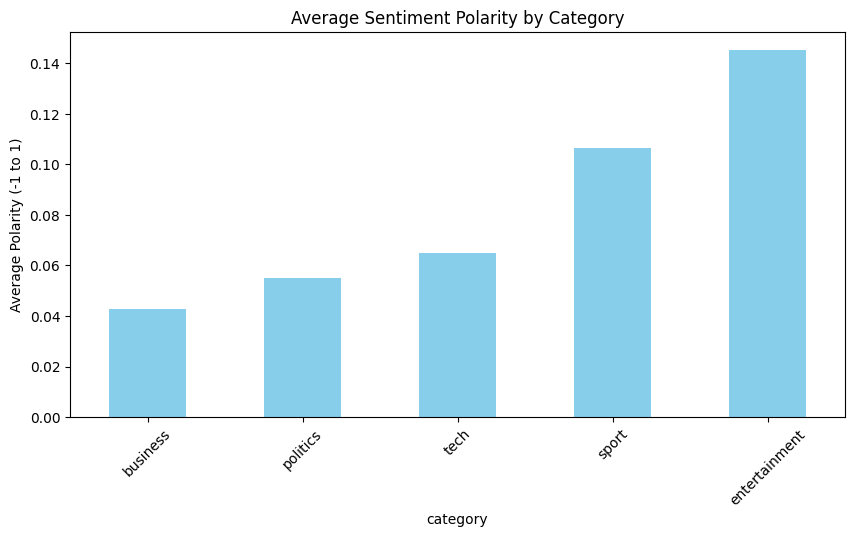

In [49]:
# Step 3 — Average Polarity Per Category

avg_polarity = df.groupby('category')['polarity'].mean().sort_values()
avg_polarity.plot(kind='bar', figsize=(10,5), color='skyblue')
plt.title("Average Sentiment Polarity by Category")
plt.ylabel("Average Polarity (-1 to 1)")
plt.xticks(rotation=45)
plt.show()


In [50]:
# Step 4 — Optional: Emotion Approximation (Basic)

# Using simple TextBlob approach to approximate emotion by polarity
def get_emotion(polarity):
    if polarity > 0.3:
        return "Happy/Positive"
    elif polarity < -0.3:
        return "Angry/Negative"
    else:
        return "Neutral/Calm"

df['emotion'] = df['polarity'].apply(get_emotion)
df[['content','emotion']].head(5)


,content,emotion
0,worldcom ex-boss launches defence lawyers defe...,Neutral/Calm
1,german business confidence slides german busin...,Neutral/Calm
2,bbc poll indicates economic gloom citizens in ...,Neutral/Calm
3,lifestyle governs mobile choice faster bett...,Neutral/Calm
4,enron bosses in $168m payout eighteen former e...,Neutral/Calm


In [51]:
# Module 7 — Multi-Class Text Classification

# Step 1 — Import Libraries & Split Data

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Features & labels
X = X_tfidf  # TF-IDF from Module 3
y = df['category']

# Encode labels
le = LabelEncoder()
y_enc = le.fit_transform(y)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=0.2, random_state=42, stratify=y_enc)

print("Train size:", X_train.shape[0], "Test size:", X_test.shape[0])


Train size: 1192 Test size: 298



=== Logistic Regression ===
Accuracy: 0.97
               precision    recall  f1-score   support

     business       0.94      0.99      0.96        67
entertainment       0.98      1.00      0.99        55
     politics       0.98      0.93      0.95        55
        sport       0.99      1.00      0.99        69
         tech       0.96      0.92      0.94        52

     accuracy                           0.97       298
    macro avg       0.97      0.97      0.97       298
 weighted avg       0.97      0.97      0.97       298



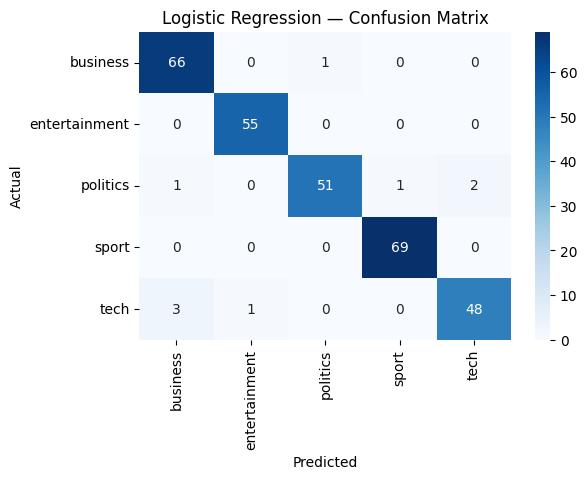


=== Multinomial NB ===
Accuracy: 0.97
               precision    recall  f1-score   support

     business       0.94      0.97      0.96        67
entertainment       1.00      1.00      1.00        55
     politics       0.96      0.93      0.94        55
        sport       0.99      1.00      0.99        69
         tech       0.96      0.94      0.95        52

     accuracy                           0.97       298
    macro avg       0.97      0.97      0.97       298
 weighted avg       0.97      0.97      0.97       298



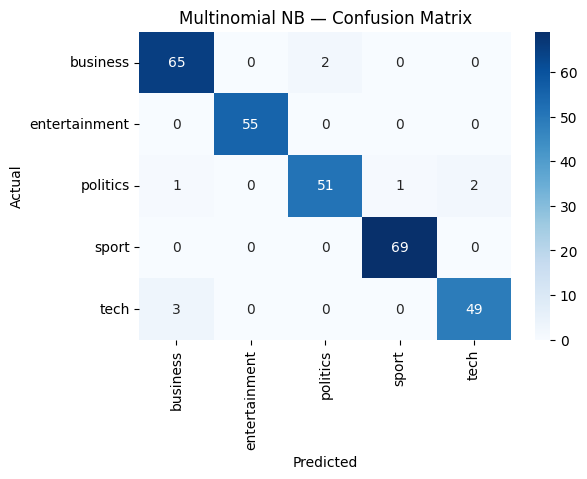


=== Random Forest ===
Accuracy: 0.96
               precision    recall  f1-score   support

     business       0.92      0.97      0.94        67
entertainment       0.98      0.96      0.97        55
     politics       0.96      0.95      0.95        55
        sport       0.99      0.99      0.99        69
         tech       0.96      0.92      0.94        52

     accuracy                           0.96       298
    macro avg       0.96      0.96      0.96       298
 weighted avg       0.96      0.96      0.96       298



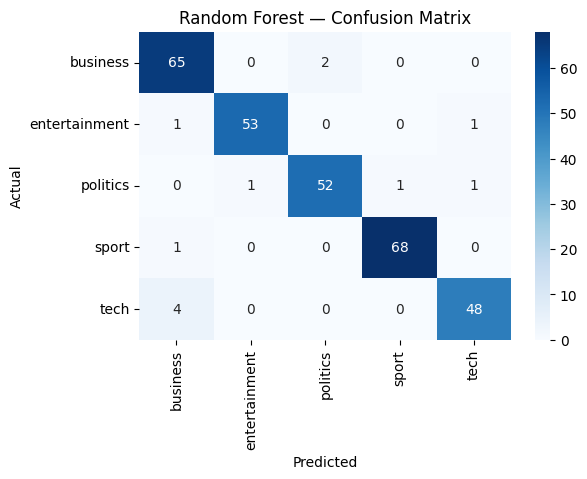

In [52]:
# Step 2 — Train Multiple Classifiers

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Multinomial NB": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Train & evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n=== {name} ===")
    print("Accuracy:", round(acc,3))
    print(classification_report(y_test, y_pred, target_names=le.classes_))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
    plt.title(f"{name} — Confusion Matrix")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()


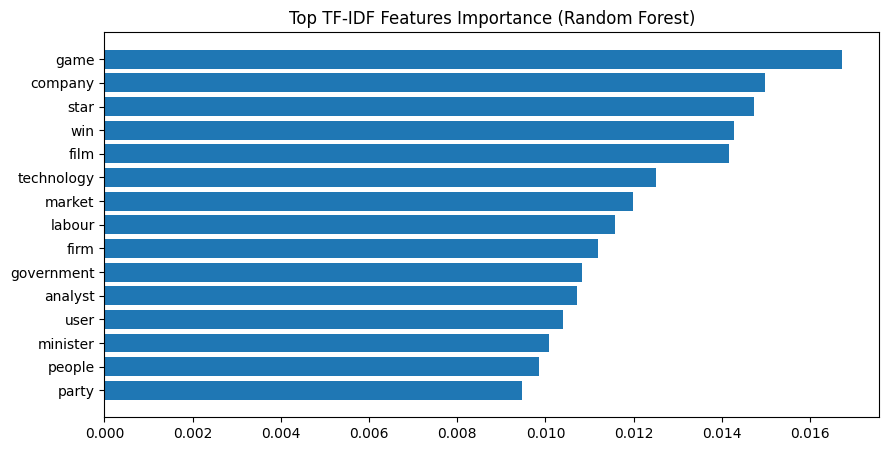

In [53]:
# Step 3 — Feature Selection / Importance

rf = models["Random Forest"]
importances = rf.feature_importances_
indices = np.argsort(importances)[-15:]  # top 15

plt.figure(figsize=(10,5))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), np.array(tfidf.get_feature_names_out())[indices])
plt.title("Top TF-IDF Features Importance (Random Forest)")
plt.show()


In [54]:
# Module 8 — Named Entity Recognition (NER) & Analysis

# Step 1 — Extract Entities for Each Article

# Function to extract named entities
def extract_entities(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

# Apply to dataset
df['entities'] = df['clean_text'].apply(extract_entities)
df[['content','entities']].head(3)


,content,entities
0,worldcom ex-boss launches defence lawyers defe...,"[(first, ORDINAL), (cynthia cooper, PERSON), (..."
1,german business confidence slides german busin...,"[(german, NORP), (german, NORP), (february, DA..."
2,bbc poll indicates economic gloom citizens in ...,"[(bbc, ORG), (bbc world service, ORG), (asian,..."


In [55]:
# Step 2 — Count Entity Types per Article

from collections import Counter

def entity_counts(entity_list):
    labels = [label for text,label in entity_list]
    return Counter(labels)

df['entity_counts'] = df['entities'].apply(entity_counts)
df[['content','entity_counts']].head(3)


,content,entity_counts
0,worldcom ex-boss launches defence lawyers defe...,"{'ORDINAL': 1, 'PERSON': 4, 'GPE': 1, 'DATE': ..."
1,german business confidence slides german busin...,"{'NORP': 5, 'DATE': 6, 'LOC': 1, 'PERSON': 3, ..."
2,bbc poll indicates economic gloom citizens in ...,"{'ORG': 5, 'NORP': 2, 'CARDINAL': 5, 'GPE': 9,..."


In [56]:
# Step 3 — Aggregate Entity Frequency Across Categories

categories = df['category'].unique()
entity_summary = {}

for cat in categories:
    entities_cat = df[df['category']==cat]['entities'].sum()
    entity_summary[cat] = Counter([label for text,label in entities_cat])

entity_df = pd.DataFrame(entity_summary).fillna(0).astype(int)
entity_df


,business,tech,politics,sport,entertainment
ORDINAL,146,230,194,587,282
PERSON,721,552,1421,2029,1628
GPE,1010,419,610,1242,471
DATE,1497,780,875,1123,963
ORG,1001,923,456,619,559
NORP,641,298,817,638,414
LOC,146,109,108,35,40
PRODUCT,9,37,13,26,13
CARDINAL,467,733,439,846,665
MONEY,24,13,2,1,28


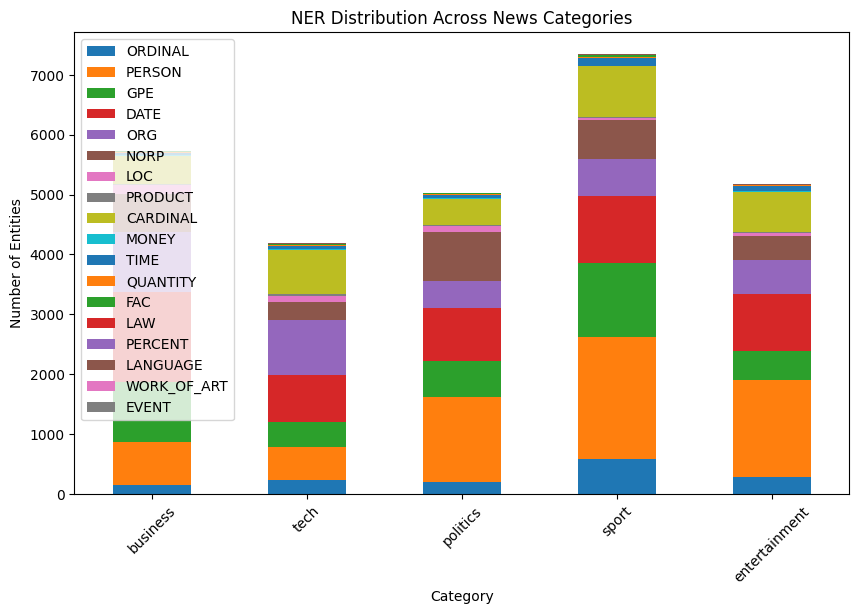

In [57]:
# Step 4 — Visualize Top Entity Types Per Category

entity_df.T.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title("NER Distribution Across News Categories")
plt.xlabel("Category")
plt.ylabel("Number of Entities")
plt.xticks(rotation=45)
plt.show()


In [58]:
# Step 5 — Optional: Top 10 Most Frequent Entities Overall

all_entities = df['entities'].sum()
entity_texts = [text for text,label in all_entities]
entity_freq = Counter(entity_texts).most_common(10)

print("Top 10 Most Frequent Entities:")
for ent, count in entity_freq:
    print(f"{ent}: {count}")


Top 10 Most Frequent Entities:
one: 828
first: 683
two: 573
second: 358
british: 306
three: 298
britain: 290
european: 262
last year: 259
london: 259
